# 1. Install Dependencies and Setup

In [1]:
# Install all libraries and Dependencies usig requirements.txt file in Terminal
# Created a environment using Python version(3.10.x)
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.3.1
aiofiles                     22.1.0
aiosqlite                    0.21.0
anyio                        4.9.0
argon2-cffi                  25.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.4
bleach                       6.2.0
cachetools                   5.5.2
certifi                      2025.7.14
cffi                         1.17.1
charset-normalizer           3.4.2
click                        8.2.1
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.15
decorator                    5.2.1
defusedxml                   0.7.1
entrypoints                  0


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU only
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')  ## Use code if you want to use GPU
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

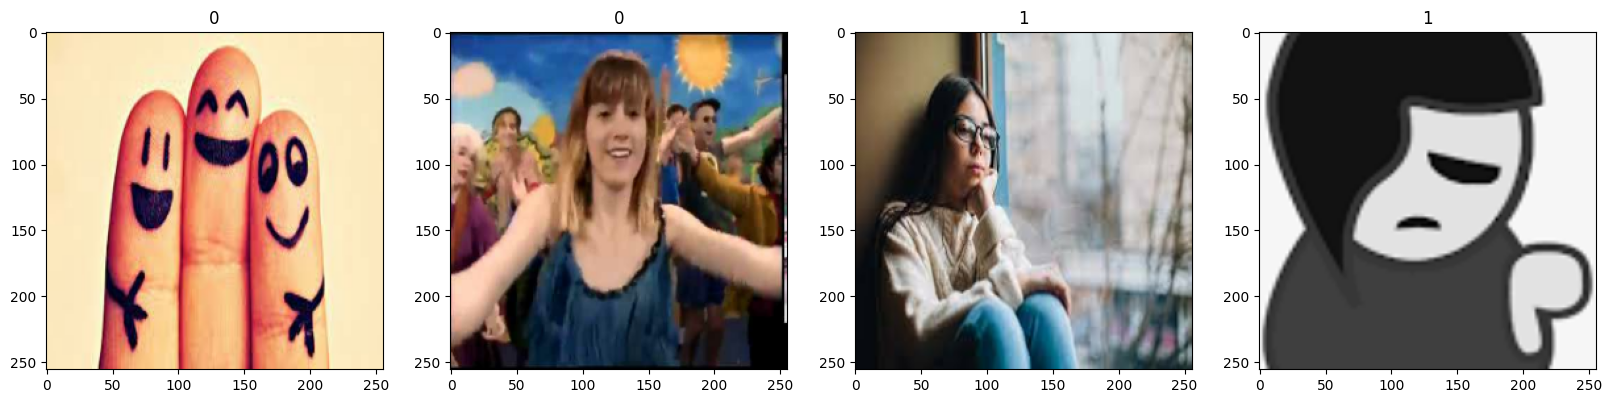

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          ...,
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01]],
 
         [[6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          ...,
          [6.93780661e-01, 6.93780661e-01, 6.93780661e-01],
          [6.93780661e-01, 6.93780661e-01, 6.93780661e-01],
          [6.93780661e-01, 6.93780661e-01, 6.93780661e-01]],
 
         [[6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          [6.94117665e-01, 6.94117665e-01, 6.94117665e-01],
          ...,
          [6.92248762e-01, 6.92248762e-01, 6.9224

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU only
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 19s 2s/step - loss: 3.2022 - accuracy: 0.5446 - val_loss: 2.0124 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.9581 - accuracy: 0.5982 - val_loss: 0.4439 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 19s 2s/step - loss: 0.4874 - accuracy: 0.7812 - val_loss: 0.4259 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 13s 2s/step - loss: 0.3875 - accuracy: 0.8571 - val_loss: 0.3130 - val_accuracy: 0.9688
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.2844 - accuracy: 0.9241 - val_loss: 0.2226 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 13s 2s/step - loss: 0.1842 - accuracy: 0.9643 - val_loss: 0.1800 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 13s 2s/step - loss: 0.1578 - accuracy: 0.9643 - val_loss: 0.0718 - val_accuracy: 1.0000
Epoch 8/20
7/7 [==================

# 8. Plot Performance

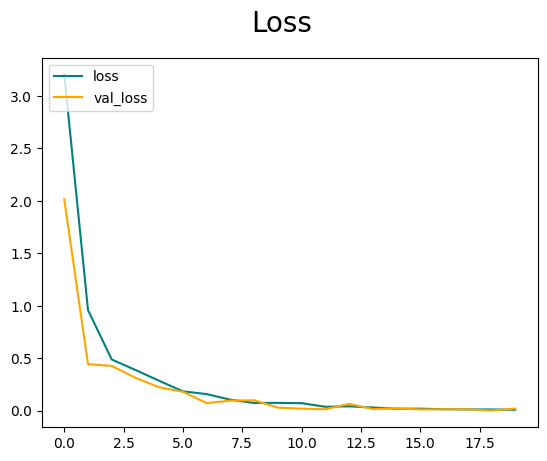

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

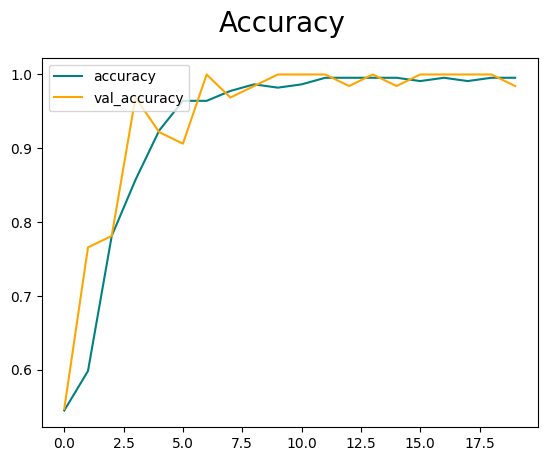

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [30]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU only
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 242ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [34]:
import cv2

In [35]:
import os
print(os.getcwd())


c:\Users\ajits\OneDrive\Desktop\PROJECTS\DL\CNN-Image Classification


In [36]:
import os

print("Current directory:", os.getcwd())
print("Files in this directory:")
print(os.listdir())


Current directory: c:\Users\ajits\OneDrive\Desktop\PROJECTS\DL\CNN-Image Classification
Files in this directory:
['.git', '.gitignore', 'data', 'Getting_Started_CPU_Only.ipynb', 'imageclassifier.h5', 'logs', 'models', 'requirements.txt', 'Test Data', '__pycache__']


In [37]:
import os

# List files in 'data' folder
data_path = os.path.join(os.getcwd(), 'data')
print("Files in 'data':", os.listdir(data_path))


Files in 'data': ['happy', 'sad']


In [38]:
# List files inside 'data/happy'
print("Files in 'data/happy':", os.listdir(os.path.join(data_path, 'happy')))

# List files inside 'data/sad'
print("Files in 'data/sad':", os.listdir(os.path.join(data_path, 'sad')))


Files in 'data/happy': ['05-12-21-happy-people.jpg', '07-120104-happy_people_are_not_nice_people.jpg', '1-2.jpg', '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg', '11-Habits-of-Truly-Happy-People.jpg', '154006829.jpg', '170404-happy-workers-feature.jpg', '1902539.jpg', '1902540.jpg', '1902587.jpg', '1920px-face-smile.svg_.png.jpg', '1HEoLBLidT2u4mhJ0oiDgig.png', '227-2271622_happy-people-business-team-celebrating-png.png', '60632274._UY200_.jpg', '7-Habits-of-Happy-People-image.jpeg', '7-principles-of-successful-and-happy-people.png', '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg', '8cxKy5g9i.jpg', '960x0.jpg', 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg', 'A_Sep20_14_1189155141.jpg', 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg', 'blog_image_20180219221810890.jpg', 'brady-bunch-3.jpg', 'e162ccda8ce0f197f8863f327add9233.jpg', 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg', 'friends-happy-190821-800x450.jp

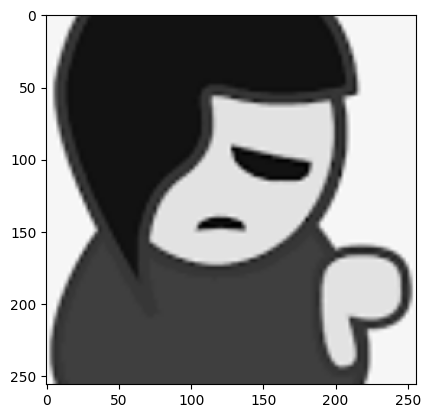

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
img_path = os.path.join('data', 'sad', 'image17.jpeg')


In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [42]:
yhat

array([[0.9998199]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [44]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU only
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


array([[0.9999996]], dtype=float32)

# Final Model for Prediction of Unseen or Test Data

In [48]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your model
model = load_model('models/imageclassifier.h5')

# Path to the test data folder
test_folder = 'Test Data'             ## CAN TEST IT USING TEST DATA AT ONCE

# Get all image file names from test folder
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Define target size expected by model
IMG_SIZE = (256, 256)

# Loop through all test images
for image_name in image_files:
    img_path = os.path.join(test_folder, image_name)
    
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict
    yhat = model.predict(img)
    prediction = "Sad" if yhat[0][0] > 0.5 else "Happy"
    
    # Print result
    print(f"Image: {image_name} → Prediction: {prediction} (Confidence: {yhat[0][0]:.6f})")


1/1 [==============================] - 0s 67ms/step
Image: download (1).jpg → Prediction: Happy (Confidence: 0.218385)
1/1 [==============================] - 0s 28ms/step
Image: download.jpg → Prediction: Sad (Confidence: 0.998873)
1/1 [==============================] - 0s 28ms/step
Image: image.png → Prediction: Sad (Confidence: 0.974273)
